# Logisitc Regression Analysis:
## _An Example Model Predicting Survival Aboard the Titanic_
---

Prepared By: Jason Schenck  
Date: February 20th 2017  
CSC-570 Data Science Essentials


<br>
<big>Table Of Contents</big>

---
* [1 Introduction][Introduction]  


* [2 Data Preparation][Data Preparation]


* [3 Parameter Optimization][Parameter Optimization]


* [4 Logistic Model Definition][Logistic Model Definition]


* [5 Results: Model Scoring][Results: Model Scoring]

---

[Introduction]: #1.-Introduction
[Data Preparation]: #2.-Data-Preparation
[Parameter Optimization]: #3.-Parameter-Optimization
[Logistic Model Definition]: #4.-Logistic-Model-Definition
[Results: Model Scoring]: #5.-Results:-Model-Scoring

### 1. Introduction

Previously, I performed an EDA (Exploratory Data Analysis) on the Titanic Survival dataset provided by Kaggle. In this analysis I will be continuing forward with Logistic Regression Analysis. I've implemented a custom function that will determine the best set of features to include as 'X' based on highest AUC.

I'll begin first, by preparing the data for analysis which consists of the following steps:

1. Choosing some set of independent features to work with, X
2. Correcting all missing values
3. One hot encoding for any categorical variables with respect to majority distribution from EDA.
4. Scaling the data
5. Splitting the data with a 20% holdout 

Once the data frame is properly created and scaled accordingly, A logistic model is defined and passed the training data to generate predictions. Finally, I will measure the accuracy of my model by examing the AUC (Area Under Curve) score generated and plot this inline. 


### 2. Data Preparation

In [1]:
# Imports
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import itertools
%pylab inline

/Users/jasonschenck/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read in Titanic train data to dataframe
df = pd.read_csv("train.csv")

In [3]:
# Print columns/features
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Next, we need a new dataframe for only the features for consideration set 'Z'
Z = pd.DataFrame()

In [5]:
# Of all the available features, from previous EDA, I have decided to start by working with only the below features.
# Sex, Age, Pclass, SibSp, Parch, Fare, Embarked, and y = Survived
Z['Sex']=df['Sex']
Z['Age']=df['Age']
Z['Pclass']=df['Pclass']
Z['SibSp']=df['SibSp']
Z['Parch']=df['Parch']
Z['Fare']=df['Fare']
Z['Embarked']=df['Embarked']
Z['Survived']=df['Survived']

In [6]:
# y = Survived , drop from set Z
y = Z['Survived']
Z = Z.drop(['Survived'], axis=1)

In [7]:
# Print the new DF
Z

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked
0,male,22.0,3,1,0,7.2500,S
1,female,38.0,1,1,0,71.2833,C
2,female,26.0,3,0,0,7.9250,S
3,female,35.0,1,1,0,53.1000,S
4,male,35.0,3,0,0,8.0500,S
5,male,NaN,3,0,0,8.4583,Q
6,male,54.0,1,0,0,51.8625,S
7,male,2.0,3,3,1,21.0750,S
8,female,27.0,3,0,2,11.1333,S
9,female,14.0,2,1,0,30.0708,C


Feature Assumptions from _[previous EDA](https://nbviewer.jupyter.org/github/JDSchenck/CSC570-DataSci/blob/master/Titanic%20EDA/EDA-Titanic.ipynb)_:
> - **Sex**: Categorical, binary, classes: 'male' or 'female', distribution male = ~65%, female = ~35%, No missing values.
> - **Age**: Continuous, std dev = ~14.53, mean = ~30, _177 Missing values_
> - **Pclass**: Categorical, three classes: '1', '2', or '3' , distribution 1 = ~24%, 2 = ~21%, 3 = ~55%, No missing values.
> - **SibSp**: Continuous(small range of 0 to 8), mean = ~0.52 , mode = 0, std dev = ~1.1, _Var has bias_, No missing values.
> - **Parch**: Continuous (small range of 0 to 6), mean = ~0.38, mode = 0, std dev = ~0.81, _Var has bias_, No missing values
> - **Fare**: Continuous (range from 0 to ~512.33), mean = ~32.20, std dev = ~49.69, Value in currency Pounds, No missing values.
> - **Embarked**: Categorical, three categories of ports ('S')outhampton, ('C')herbourg, and ('Q')ueenstown, distribution heavily to 'S', _2 missing values_.
> - **Survived**: Categorical, binary 0 = no, 1 = yes for survived. Dependent variable (y) for predicton model. No missing values.

Using the above information from EDA, I will start by handling missing values.

In [8]:
# Age: 177 missing values -- Use mean age to fill in for the missing age values. Get exact mean.

mean_age = Z.Age.mean()
print(mean_age)

29.69911764705882


In [9]:
# Replace all missing ages with the mean age.
# Note: This is not the BEST possible strategy, but is better than dropping 177 observations completely.

Z.Age = Z.Age.fillna(value=mean_age)

In [10]:
# Check for missing
Z[Z.Age.isnull()]

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked


Now for the Embarked missing values, recall _[from my EDA](https://nbviewer.jupyter.org/github/JDSchenck/CSC570-DataSci/blob/master/Titanic%20EDA/EDA-Titanic.ipynb#2.1.7-Embarked)_:
>"Two passengers with missing Embarked values. Both of which survived. **_But how can a passenger not have a port of embarkation?_** Interesting. Since there's only two, I performed a brief Google search for 'Icard, Miss. Amelie' and found something very interesting! 

>From the _[Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)_:
>"Miss Rose Amélie Icard, 38, was born in Vaucluse, France on 31 October 1872, her father Marc Icard lived at Mafs á Murs (?).

>She boarded the Titanic at Southampton as maid to Mrs George Nelson Stone. She travelled on Mrs Stone's ticket (#113572).

>Mrs Stone and Miss Icard were rescued by the Carpathia in lifeboat 6."

In [11]:
# Double check for the missing values.
Z[Z.Embarked.isnull()]

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked
61,female,38.0,1,0,0,80.0,NaN
829,female,62.0,1,0,0,80.0,NaN


In [12]:
# As verified, both of these passengers embarked from Southampton 'S', Set manually.
Z.Embarked = Z.Embarked.fillna(value='S')

In [13]:
# Ensure corrected
Z[Z.Embarked.isnull()]

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked


Now that all missing values have been accounted for, I will perform one hot encoding on all categorical variables using the majority distribution data uncovered in my original EDA. I will try and keep only the fewest number of encoded categoricals such that they collectively represent >50% of our sample. Dropping all others help to prevent collinearity. 

I also plan to experiment by engineering a new feature, 'TravelingAlone', by combining the data of two existing ones: SibSp and Parch. While tuning the model, perhaps this may be useful.

In [14]:
# Encoding both categoricals SibSp and Parch
sibsp_temp = pd.get_dummies(Z.SibSp)
parch_temp = pd.get_dummies(Z.Parch)

# Here's a peek at what was just generated for both sibsp and parch.
print("--- sibsp_temp: result of get_dummies ---")
sibsp_temp.head()

--- sibsp_temp: result of get_dummies ---


,0,1,2,3,4,5,8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [15]:
# One hot encoding for SibSp, keeping only the classes 0 and 1 due to the distribution data from EDA.
Z['SibSp0'] = sibsp_temp.ix[:,'0':'0']
Z['SibSp1'] = sibsp_temp.ix[:,'1':'1']
Z.head()

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked,SibSp0,SibSp1
0,male,22.0,3,1,0,7.2500,S,0,1
1,female,38.0,1,1,0,71.2833,C,0,1
2,female,26.0,3,0,0,7.9250,S,1,0
3,female,35.0,1,1,0,53.1000,S,0,1
4,male,35.0,3,0,0,8.0500,S,1,0


In [16]:
# One hot encoding for Parch, keeping only the classes 0,1,and 2 due to the distribution data from EDA.
Z['Parch0'] = parch_temp.ix[:,'0':'0']
Z['Parch1'] = parch_temp.ix[:,'1':'1']
Z['Parch2'] = parch_temp.ix[:,'2':'2']
Z.head(20)

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked,SibSp0,SibSp1,Parch0,Parch1,Parch2
0,male,22.000000,3,1,0,7.2500,S,0,1,1,0,0
1,female,38.000000,1,1,0,71.2833,C,0,1,1,0,0
2,female,26.000000,3,0,0,7.9250,S,1,0,1,0,0
3,female,35.000000,1,1,0,53.1000,S,0,1,1,0,0
4,male,35.000000,3,0,0,8.0500,S,1,0,1,0,0
5,male,29.699118,3,0,0,8.4583,Q,1,0,1,0,0
6,male,54.000000,1,0,0,51.8625,S,1,0,1,0,0
7,male,2.000000,3,3,1,21.0750,S,0,0,0,1,0
8,female,27.000000,3,0,2,11.1333,S,1,0,0,0,1
9,female,14.000000,2,1,0,30.0708,C,0,1,1,0,0


In [17]:
# Build new feature data for 'TravelingAlone' via iteration.
# TravelingAlone = 1 --> Passenger was indeed alone on the ship
# TravelingAlone = 0 --> Passenger was NOT alone, and with atleast 1 related person (parent,child,brother,etc.)

TravelingAlone = list()
value = 0

# Iterate for all observations (891), determine and store the appropriate TravelingAlone feature value.
while value < len(sibsp_temp):
    if ((sibsp_temp.iloc[value,0] == 0) and (parch_temp.iloc[value,0] == 0)):
        # Both 0, then travelingalone = 1
        TravelingAlone.append(1)
        
    else:
        # Not traveling alone, therefore travelingalone = 0
        TravelingAlone.append(0)
        
    value+=1

In [18]:
# Append the new feature to Z, and preview
Z['TravelingAlone'] = TravelingAlone
Z.head(15)

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked,SibSp0,SibSp1,Parch0,Parch1,Parch2,TravelingAlone
0,male,22.000000,3,1,0,7.2500,S,0,1,1,0,0,0
1,female,38.000000,1,1,0,71.2833,C,0,1,1,0,0,0
2,female,26.000000,3,0,0,7.9250,S,1,0,1,0,0,0
3,female,35.000000,1,1,0,53.1000,S,0,1,1,0,0,0
4,male,35.000000,3,0,0,8.0500,S,1,0,1,0,0,0
5,male,29.699118,3,0,0,8.4583,Q,1,0,1,0,0,0
6,male,54.000000,1,0,0,51.8625,S,1,0,1,0,0,0
7,male,2.000000,3,3,1,21.0750,S,0,0,0,1,0,1
8,female,27.000000,3,0,2,11.1333,S,1,0,0,0,1,0
9,female,14.000000,2,1,0,30.0708,C,0,1,1,0,0,0


Next, I will use **_"one hot encoding"_** to convert the categoricals Sex, Pclass, and Embarked to numerical indicators.

In [19]:
# Generator binary data table for Sex, dropping male.
# Now, If: Sex = 1 then 'female' ; If: Sex = 0 then 'male' inferred. 
Z['Sex']=pd.get_dummies(Z.Sex)['female']
Z.head()

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked,SibSp0,SibSp1,Parch0,Parch1,Parch2,TravelingAlone
0,0,22.0,3,1,0,7.2500,S,0,1,1,0,0,0
1,1,38.0,1,1,0,71.2833,C,0,1,1,0,0,0
2,1,26.0,3,0,0,7.9250,S,1,0,1,0,0,0
3,1,35.0,1,1,0,53.1000,S,0,1,1,0,0,0
4,0,35.0,3,0,0,8.0500,S,1,0,1,0,0,0


In [20]:
# Applying the same technique to Pclass, a bit more complex one hot encoding due to 3 categories
# First create two new features Pclass1,Pclass3 from get_dummies, then drop Pclass
# Now, If: Pclass1 & Pclass3 = 0, Pclass is 2 inferred. 

Z['Pclass1']=pd.get_dummies(Z.Pclass)[1]
Z['Pclass3']=pd.get_dummies(Z.Pclass)[3]
Z = Z.drop('Pclass', 1)

In [21]:
# Checking to ensure accuracy
Z.head(15)

,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp0,SibSp1,Parch0,Parch1,Parch2,TravelingAlone,Pclass1,Pclass3
0,0,22.000000,1,0,7.2500,S,0,1,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,C,0,1,1,0,0,0,1,0
2,1,26.000000,0,0,7.9250,S,1,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,S,0,1,1,0,0,0,1,0
4,0,35.000000,0,0,8.0500,S,1,0,1,0,0,0,0,1
5,0,29.699118,0,0,8.4583,Q,1,0,1,0,0,0,0,1
6,0,54.000000,0,0,51.8625,S,1,0,1,0,0,0,1,0
7,0,2.000000,3,1,21.0750,S,0,0,0,1,0,1,0,1
8,1,27.000000,0,2,11.1333,S,1,0,0,0,1,0,0,1
9,1,14.000000,1,0,30.0708,C,0,1,1,0,0,0,0,0


In [22]:
# Embarked: 3 categories ('S', 'C', and 'Q') therefore applying same tactic as used for Pclass.
# Now, If: EmbarkedS & EmbarkedC = 0, Embarked is 'Q' inferred.
Z['EmbarkedS']=pd.get_dummies(Z.Embarked)['S']
Z['EmbarkedC']=pd.get_dummies(Z.Embarked)['C']
Z = Z.drop('Embarked', 1)
Z.head()

,Sex,Age,SibSp,Parch,Fare,SibSp0,SibSp1,Parch0,Parch1,Parch2,TravelingAlone,Pclass1,Pclass3,EmbarkedS,EmbarkedC
0,0,22.0,1,0,7.2500,0,1,1,0,0,0,0,1,1,0
1,1,38.0,1,0,71.2833,0,1,1,0,0,0,1,0,0,1
2,1,26.0,0,0,7.9250,1,0,1,0,0,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,1,1,0,0,0,1,0,1,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,0,0,1,1,0


At this point, I am now ready to move into the optimization phase. To recap, I now have two sets of variables: Z and y. Where Z is the set of all the possible independent features for Logistic Regression, and y is the dependent variable Survived for prediction. All missing fields have been handled approiately, categoricals have all been set to numerical indicators using one hot encoding, and I have a new engineered feature 'TravelingAlone' that I created by combining the features 'SibSp' & 'Parch'. The next step is to optimize the best combination of features for X.

### 3. Parameter Optimization 

First, I will generate a list of all possible combinations of features contained in Z. This will allow me to then try each of them as possible sets of X by iteratively scaling, predicting, and scoring for each subset and then selecting the subset of Z which results in the highest AUC score as my X set. I'm not sure whether or not this will prove useful, but I figured I'd give it a try and see what happens. 

In [23]:
# List of all features in Z, which will be candidates for X.
possible_X_feats = list(["Sex","Age","Fare","TravelingAlone","Pclass1","Pclass3","EmbarkedS","EmbarkedC","SibSp0",
                         "SibSp1","Parch0","Parch1","Parch2"])

# Generate all possible combinations for X
possible_X_combos = []

for i in range(2, len(possible_X_feats)+1):
    possible_X_combos.extend(itertools.combinations(possible_X_feats, i))

In [24]:
def scalePossibleX(combo):
    
    scaler = StandardScaler()
    possible_X = pd.DataFrame()
    
    
    for feature in combo:
        possible_X[feature] = Z[feature]
    
    
    # Scale the possible X
    possible_X_scaled = scaler.fit_transform(possible_X)
    
    return possible_X_scaled

In [25]:
def pickBestX(possible_X_combos):
    best_X_AUC = 0
    best_X = list()
    for combo in possible_X_combos:
        
        possible_X = scalePossibleX(combo)
        
        # Split into test/train this possible_X
        X_train,X_test,y_train,y_test = train_test_split(possible_X,y,test_size=0.2,random_state=42)
        
        # Logistic Model -- params kept constant for function
        model = LogisticRegression(penalty='l1', C=1)
        
        # Fit this possible_X to model
        model.fit(X_train,y_train)
        
        # Get AUC
        possible_X_AUC = roc_auc_score(y_test,model.predict(X_test))
        
        
        # Check if highest AUC, update the record accordingly

        if (possible_X_AUC > best_X_AUC):
            best_X_AUC = possible_X_AUC
            #best_X.clear()
            best_X.append(combo)
            best_X.append(best_X_AUC)
            
        
    return best_X_AUC, best_X

In [26]:
# Find the best subset of Z for X which yields the highest AUC score
best_X_AUC,best_X = pickBestX(possible_X_combos)

In [27]:
print("Best Features and AUC Scores: \n")
best_X

Best Features and AUC Scores: 



[('Sex', 'Age'),
 0.77039897039897043,
 ('Sex', 'Age', 'Pclass1'),
 0.77715572715572723,
 ('Sex', 'Age', 'Pclass3'),
 0.77992277992277992,
 ('Sex', 'Age', 'Pclass1', 'Pclass3'),
 0.79144144144144146,
 ('Sex', 'Age', 'Pclass1', 'Pclass3', 'SibSp1'),
 0.79620334620334621,
 ('Sex', 'Age', 'Pclass1', 'Pclass3', 'SibSp1', 'Parch1'),
 0.79819819819819826,
 ('Sex', 'Age', 'Pclass1', 'Pclass3', 'EmbarkedS', 'SibSp0', 'SibSp1'),
 0.8001930501930502,
 ('Sex', 'Age', 'Pclass1', 'Pclass3', 'SibSp0', 'SibSp1', 'Parch2'),
 0.80772200772200775]

### 4. Logistic Model Definition

In [28]:
# Define X
X = pd.DataFrame()
X['Sex'] = Z['Sex']
X['Age'] = Z['Age']
X['Pclass1'] = Z['Pclass1']
X['Pclass3'] = Z['Pclass3']
X['SibSp0'] = Z['SibSp0']
X['SibSp1'] = Z['SibSp1']
X['Parch2'] = Z['Parch2']

# Scale X
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Model -- params tuned from sklearn docs
model = LogisticRegression(penalty='l2', C=1, solver='newton-cg',fit_intercept=True,max_iter=100)
        
# Fit this possible_X to model
model.fit(X_train,y_train)
        
# Test and print the AUC Score
X_AUC = roc_auc_score(y_test,model.predict(X_test))
print("Best Logistic AUC = %2.2f" %X_AUC)


Best Logistic AUC = 0.80


### 5. Results: Model Scoring

In [29]:
# Logistic Accuracy Score
print("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.82


In [30]:
# Logistic AUC Score & Classification Report
print("Logistic AUC = %2.2f" % X_AUC)
print(classification_report(y_test, model.predict(X_test)))

Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.82      0.88      0.85       105
          1       0.81      0.73      0.77        74

avg / total       0.82      0.82      0.81       179



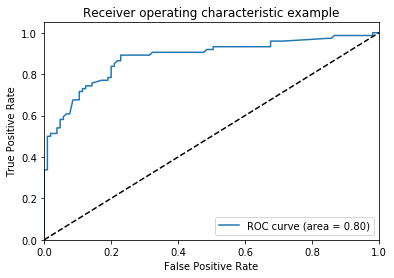

In [31]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % X_AUC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()